In [1]:
# Importing requried librarires :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset :

df=pd.read_csv('diabetic_data.csv')

In [3]:
df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [4]:
# Number of rows and columns :

df.shape

(101766, 50)

# Dropping records for 'readmitted'= '>30'

#removing invalid/unknown entries for gender
df=df[df['gender']!='Unknown/Invalid']
#dropping rows with NAs.
df.dropna(inplace=True)

In [5]:
#removing readmitted'= '>30' entries for df
df=df[df['readmitted']!='>30']

# dropping rows with NAs.
#df.dropna(inplace=True)

In [6]:
df.shape

(66221, 50)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66221 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                66221 non-null int64
patient_nbr                 66221 non-null int64
race                        66221 non-null object
gender                      66221 non-null object
age                         66221 non-null object
weight                      66221 non-null object
admission_type_id           66221 non-null int64
discharge_disposition_id    66221 non-null int64
admission_source_id         66221 non-null int64
time_in_hospital            66221 non-null int64
payer_code                  66221 non-null object
medical_specialty           66221 non-null object
num_lab_procedures          66221 non-null int64
num_procedures              66221 non-null int64
num_medications             66221 non-null int64
number_outpatient           66221 non-null int64
number_emergency            66221 non-null int64
number_inpatient            66221 non-null int64
di

In [8]:
#pd.options.display.max_colwidth = None   # to view all the data

#replacing 0 with np.nan for all columns accept 'outcome'

#df_ind=df[:]

df.iloc[:,:-1]=df.iloc[:,:-1].replace({0:np.nan})

# Missing value percentage calculation :

In [9]:
# checking missing value percentage:

percenatge = []
for i in df.columns:
    p = (df[df[i]=='?'].shape[0]/df.shape[0])*100
    percenatge.append(p)
df_missing=pd.DataFrame(percenatge,index=df.columns,columns=['percentage of missing']).sort_values(by='percentage of missing',ascending=False) 
df_missing[df_missing['percentage of missing']>0]

/home/shrihari/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


percentage of missing
weight                         97.452470
medical_specialty              47.919844
payer_code                     39.908790
race                            2.620015
diag_3                          1.638453
diag_2                          0.428867
diag_1                          0.025672

In [10]:
df1 = df.copy()

# Dropping unwanted columns :

In [11]:
# Since feature 'weight' as many missing values we can drop it  (we need to do general code to drop features which have more then 50% missing values)
# And also 'encounter_id', 'patient_nbr' are not use for modeling 
# glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,examide,citoglipton have more single values 
# 'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','examide','citoglipton'


df1 = df1.drop(['weight','encounter_id','patient_nbr'],axis=1)

In [12]:
#dropping cols with high number of missing values
df1 = df1.drop(['payer_code','medical_specialty'],axis=1)

In [13]:
df1.shape

(66221, 45)

In [14]:
#Dropping admission_type_id', 'discharge_disposition_id', 'admission_source_id' :

df1=df1.drop(['admission_type_id','discharge_disposition_id','admission_source_id'],axis=1) 

In [15]:
df1.shape

(66221, 42)

In [16]:
df1=df1.reset_index(drop=bool)


In [17]:
df1.head()

race  gender      age  time_in_hospital  num_lab_procedures  \
0        Caucasian  Female   [0-10)                 1                  41   
1  AfricanAmerican  Female  [20-30)                 2                  11   
2        Caucasian    Male  [30-40)                 2                  44   
3        Caucasian    Male  [40-50)                 1                  51   
4        Caucasian    Male  [60-70)                 4                  70   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               5               13                  2                 0   
2               1               16                  0                 0   
3               0                8                  0                 0   
4               1               21                  0                 0   

   number_inpatient  ... citoglipton insulin glyburide-metformin  \
0                 0  ...          No      No                  No   
1                 1  ...          No      No                  No   
2                 0  ...          No      Up                  No   
3                 0  ...          No  Steady                  No   
4                 0  ...          No  Steady                  No   

   glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone  \
0                   No                       No                      No   
1                   No                       No                      No   
2                   No                       No                      No   
3                   No                       No                      No   
4                   No                       No                      No   

  metformin-pioglitazone change diabetesMed readmitted  
0                     No     No          No         NO  
1                     No     No         Yes         NO  
2                     No     Ch         Yes         NO  
3                     No     Ch         Yes         NO  
4                     No     Ch         Yes         NO  

[5 rows x 42 columns]

# Assigning proper datatypes to all the columns:¶

#Converting  admission_type_id, discharge_disposition_id, admission_source_id  into categorical columns :

for i in ['admission_type_id','discharge_disposition_id','admission_source_id']:
    df[i] = df[i].astype(np.object)

# Missing values imputation :

In [18]:
# 1). gender : Replacing 'Unknown/Invalid' with mode of gender, because only 3 values are missing/unkown :

df1.replace(['Unknown/Invalid'],df1['gender'].mode()[0],inplace=True)
df1['gender'].value_counts()

Female    35193
Male      31028
Name: gender, dtype: int64

In [19]:
# Replace '?' with 'NaN' :

df1.replace(['?'],np.nan,inplace=True)

In [20]:
# 2). race : we will include nan values in 'Other' , which is already present in it

df1['race']=df1['race'].fillna('Other')

In [21]:
df1['race'].value_counts()

Caucasian          48975
AfricanAmerican    12576
Other               2795
Hispanic            1395
Asian                480
Name: race, dtype: int64

In [22]:
# 3). diag_1 : 21 missing values (i,e ... 0.02%, so impute with mode)

df1['diag_1'] = df1['diag_1'].fillna('Other')

In [23]:
# 4). diag_2 : 0.35% of missing values, so impute with mode 
df1['diag_2'] = df1['diag_2'].fillna('Other')

In [24]:
# 5). diag_3 : 1.3% of missing values, so impute with mode 
df1['diag_3'] = df1['diag_3'].fillna('Other')

In [25]:
percenatge = []
for i in df1.columns:
    p = (df1[df1[i]=='?'].shape[0]/df1.shape[0])*100
    percenatge.append(p)
df_missing=pd.DataFrame(percenatge,index=df1.columns,columns=['percentage of missing']).sort_values(by='percentage of missing',ascending=False) 
df_missing

percentage of missing
race                                        0.0
examide                                     0.0
glyburide                                   0.0
tolbutamide                                 0.0
pioglitazone                                0.0
rosiglitazone                               0.0
acarbose                                    0.0
miglitol                                    0.0
troglitazone                                0.0
tolazamide                                  0.0
citoglipton                                 0.0
gender                                      0.0
insulin                                     0.0
glyburide-metformin                         0.0
glipizide-metformin                         0.0
glimepiride-pioglitazone                    0.0
metformin-rosiglitazone                     0.0
metformin-pioglitazone                      0.0
change                                      0.0
diabetesMed                                 0.0
glipizide                                   0.0
acetohexamide                               0.0
glimepiride                                 0.0
chlorpropamide                              0.0
age                                         0.0
time_in_hospital                            0.0
num_lab_procedures                          0.0
num_procedures                              0.0
num_medications                             0.0
number_outpatient                           0.0
number_emergency                            0.0
number_inpatient                            0.0
diag_1                                      0.0
diag_2                                      0.0
diag_3                                      0.0
number_diagnoses                            0.0
max_glu_serum                               0.0
A1Cresult                                   0.0
metformin                                   0.0
repaglinide                                 0.0
nateglinide                                 0.0
readmitted                                  0.0

# Converting Columns diag_1,diag_2,diag_3 to respective labels:

In [26]:
db1=df1.copy()

In [27]:
for i in db1['diag_1']:
    if i[:3]=='250':
        db1['diag_1'].replace({i:'Diabetes'},inplace=True)
    elif len(i)==3 and i[0] in ['8','9']:
        db1['diag_1'].replace({i:'Injury'},inplace=True)
    elif i[:2]=='71' or i[:2]=='72' or i[:2]=='73':
        db1['diag_1'].replace({i:'Musculoskeletal'},inplace=True)
    elif (i[:2] in['39','40','41','42','43','44','45'] and len(i)==3) or i=='785':
        db1['diag_1'].replace({i:'Circulatory'},inplace=True)
    elif (i[:2] in['46','47','48','49','50','51'] and len(i)==3) or i=='786':
        db1['diag_1'].replace({i:'Respiratory'},inplace=True)
    elif (i[:2] in['52','53','54','55','56','57'] and len(i)==3) or i=='787':
        db1['diag_1'].replace({i:'Digestive'},inplace=True)
    elif (i[:2] in['58','59','60','61','62'] and len(i)==3) or i=='788':
        db1['diag_1'].replace({i:'Genitourinary'},inplace=True)
    elif (i[:2] in['14','15','16','17','18','19','20','21','22','23','24','25','26','27'] and len(i)==3) or i=='780':
        db1['diag_1'].replace({i:'Neoplasms'},inplace=True)
    elif (i[:2] in['68','69','70','79','10','11','12','13'] and len(i)==3) or i in ['781','784','782']:
        db1['diag_1'].replace({i:'Neoplasms'},inplace=True)
    elif len(i) in [1,2]:
        db1['diag_1'].replace({i:'Neoplasms'},inplace=True)
    elif len(i)<=5 :
        db1['diag_1'].replace({i:'Other'},inplace=True)

In [28]:
db1['diag_1'].value_counts()

Circulatory        19598
Neoplasms           9511
Respiratory         8891
Digestive           6111
Diabetes            5439
Other               5047
Injury              4737
Musculoskeletal     3486
Genitourinary       3401
Name: diag_1, dtype: int64

In [29]:
df1['diag_1']=db1['diag_1'] 

#made db1 to avoid making changes in main db, thn assignin back the changes made to main df1

In [30]:
for i in db1['diag_2']:
    if i[:3]=='250':
        db1['diag_2'].replace({i:'Diabetes'},inplace=True)
    elif len(i)==3 and i[0] in ['8','9']:
        db1['diag_2'].replace({i:'Injury'},inplace=True)
    elif i[:2]=='71' or i[:2]=='72' or i[:2]=='73':
        db1['diag_2'].replace({i:'Musculoskeletal'},inplace=True)
    elif (i[:2] in['39','40','41','42','43','44','45'] and len(i)==3) or i=='785':
        db1['diag_2'].replace({i:'Circulatory'},inplace=True)
    elif (i[:2] in['46','47','48','49','50','51'] and len(i)==3) or i=='786':
        db1['diag_2'].replace({i:'Respiratory'},inplace=True)
    elif (i[:2] in['52','53','54','55','56','57'] and len(i)==3) or i=='787':
        db1['diag_2'].replace({i:'Digestive'},inplace=True)
    elif (i[:2] in['58','59','60','61','62'] and len(i)==3) or i=='788':
        db1['diag_2'].replace({i:'Genitourinary'},inplace=True)
    elif (i[:2] in['14','15','16','17','18','19','20','21','22','23','24','25','26','27'] and len(i)==3) or i=='780':
        db1['diag_2'].replace({i:'Neoplasms'},inplace=True)
    elif (i[:2] in['68','69','70','79','10','11','12','13'] and len(i)==3) or i in ['781','784','782']:
        db1['diag_2'].replace({i:'Neoplasms'},inplace=True)
    elif len(i) in [1,2]:
        db1['diag_2'].replace({i:'Neoplasms'},inplace=True)
    elif len(i)<=5:
        db1['diag_2'].replace({i:'Other'},inplace=True)

In [31]:
db1['diag_2'].value_counts()

Circulatory        20246
Neoplasms          12223
Diabetes            8597
Other               7277
Respiratory         6832
Genitourinary       5349
Digestive           2775
Injury              1753
Musculoskeletal     1169
Name: diag_2, dtype: int64

In [32]:
df1['diag_2']=db1['diag_2'] 

#made db1 to avoid making changes in main db, thn assignin back the changes made to main db

In [33]:
for i in db1['diag_3']:
    if i[:3]=='250':
        db1['diag_3'].replace({i:'Diabetes'},inplace=True)
    elif len(i)==3 and i[0] in ['8','9']:
        db1['diag_3'].replace({i:'Injury'},inplace=True)
    elif i[:2]=='71' or i[:2]=='72' or i[:2]=='73':
        db1['diag_3'].replace({i:'Musculoskeletal'},inplace=True)
    elif (i[:2] in['39','40','41','42','43','44','45'] and len(i)==3) or i=='785':
        db1['diag_3'].replace({i:'Circulatory'},inplace=True)
    elif (i[:2] in['46','47','48','49','50','51'] and len(i)==3) or i=='786':
        db1['diag_3'].replace({i:'Respiratory'},inplace=True)
    elif (i[:2] in['52','53','54','55','56','57'] and len(i)==3) or i=='787':
        db1['diag_3'].replace({i:'Digestive'},inplace=True)
    elif (i[:2] in['58','59','60','61','62'] and len(i)==3) or i=='788':
        db1['diag_3'].replace({i:'Genitourinary'},inplace=True)
    elif (i[:2] in['14','15','16','17','18','19','20','21','22','23','24','25','26','27'] and len(i)==3) or i=='780':
        db1['diag_3'].replace({i:'Neoplasms'},inplace=True)
    elif (i[:2] in['68','69','70','79','10','11','12','13'] and len(i)==3) or i in ['781','784','782']:
        db1['diag_3'].replace({i:'Neoplasms'},inplace=True)
    elif len(i) in [1,2]:
        db1['diag_3'].replace({i:'Neoplasms'},inplace=True)
    elif len(i)<=5:
        db1['diag_3'].replace({i:'Other'},inplace=True)

In [34]:
db1['diag_3'].value_counts()

Circulatory        19312
Neoplasms          11844
Diabetes           11335
Other               9771
Respiratory         4627
Genitourinary       4178
Digestive           2512
Injury              1373
Musculoskeletal     1268
365.44                 1
Name: diag_3, dtype: int64

In [35]:
df1['diag_3']=db1['diag_3'] 

#made db1 to avoid making changes in main db, thn assignin back the changes made to main db

In [36]:
df1.shape

(66221, 42)

In [37]:
df1.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [38]:

#apart from metamorphin,insulin all medications should be merged

keys = ['repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df1[colname] = df1[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df1['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df1['numchange'] = df1['numchange'] + df1[colname]
    del df1[colname]
    
df1['numchange'].value_counts()

0    63659
1     2506
2       55
3        1
Name: numchange, dtype: int64

In [39]:
len(keys)

19

In [40]:


#Dropping the medication cols that are merged.(19 columns)
df_merged=df1.drop(keys,axis=1)
df_merged.shape

(66221, 24)

In [41]:
df_merged.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'examide', 'citoglipton', 'insulin', 'change', 'diabetesMed',
       'readmitted', 'numchange'],
      dtype='object')

In [42]:
df_merged.head()

race  gender      age  time_in_hospital  num_lab_procedures  \
0        Caucasian  Female   [0-10)                 1                  41   
1  AfricanAmerican  Female  [20-30)                 2                  11   
2        Caucasian    Male  [30-40)                 2                  44   
3        Caucasian    Male  [40-50)                 1                  51   
4        Caucasian    Male  [60-70)                 4                  70   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               5               13                  2                 0   
2               1               16                  0                 0   
3               0                8                  0                 0   
4               1               21                  0                 0   

   number_inpatient  ... max_glu_serum A1Cresult metformin  examide  \
0                 0  ...          None      None        No       No   
1                 1  ...          None      None        No       No   
2                 0  ...          None      None        No       No   
3                 0  ...          None      None        No       No   
4                 0  ...          None      None    Steady       No   

  citoglipton insulin change diabetesMed readmitted numchange  
0          No      No     No          No         NO         0  
1          No      No     No         Yes         NO         0  
2          No      Up     Ch         Yes         NO         0  
3          No  Steady     Ch         Yes         NO         0  
4          No  Steady     Ch         Yes         NO         0  

[5 rows x 24 columns]

In [43]:
#Col:'change': any change is there in medication or not
#Col:'numchange': number of medications that are changed

In [44]:
#Converting 'numchange' from int to object as it is categorical data:

df_merged['numchange']=df_merged['numchange'].astype('object')

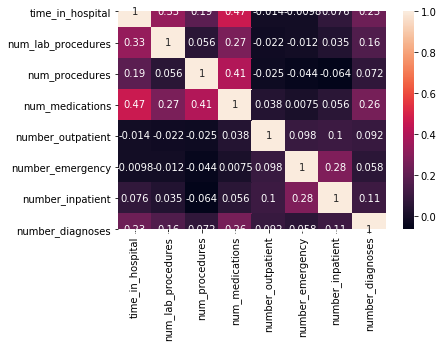

In [45]:
sns.heatmap(df_merged.corr(),annot=True)
plt.show()

# Determining X and y

In [46]:
X=df_merged.drop('readmitted',axis=1)
y=df_merged['readmitted']

In [47]:
X.head()

race  gender      age  time_in_hospital  num_lab_procedures  \
0        Caucasian  Female   [0-10)                 1                  41   
1  AfricanAmerican  Female  [20-30)                 2                  11   
2        Caucasian    Male  [30-40)                 2                  44   
3        Caucasian    Male  [40-50)                 1                  51   
4        Caucasian    Male  [60-70)                 4                  70   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               5               13                  2                 0   
2               1               16                  0                 0   
3               0                8                  0                 0   
4               1               21                  0                 0   

   number_inpatient  ... number_diagnoses max_glu_serum A1Cresult  metformin  \
0                 0  ...                1          None      None         No   
1                 1  ...                6          None      None         No   
2                 0  ...                7          None      None         No   
3                 0  ...                5          None      None         No   
4                 0  ...                7          None      None     Steady   

  examide citoglipton insulin change diabetesMed numchange  
0      No          No      No     No          No         0  
1      No          No      No     No         Yes         0  
2      No          No      Up     Ch         Yes         0  
3      No          No  Steady     Ch         Yes         0  
4      No          No  Steady     Ch         Yes         0  

[5 rows x 23 columns]

In [48]:
# Numerical columns :

num_cols=['time_in_hospital','num_lab_procedures', 'num_procedures','num_medications',
          'number_outpatient','number_emergency','number_inpatient','number_diagnoses']


# Categorical columns :

cat_cols=['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum','A1Cresult',
          'metformin', 'examide', 'citoglipton', 'insulin', 'change', 'diabetesMed', 'numchange']

In [49]:
# lets apply power transformation on numerical columns :

from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()


df_num=pd.DataFrame(pt.fit_transform(X[num_cols]),columns=num_cols)
df_num.head()

time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0         -1.609432           -0.083412       -1.039535        -3.246301   
1         -0.797658           -1.609688        1.536346        -0.196540   
2         -0.797658            0.068448        0.253458         0.196174   
3         -1.609432            0.422427       -1.039535        -1.022968   
4          0.174851            1.381108        0.253458         0.747695   

   number_outpatient  number_emergency  number_inpatient  number_diagnoses  
0          -0.402508         -0.316918         -0.630909         -2.134318  
1           2.496805         -0.316918          1.473538         -0.814811  
2          -0.402508         -0.316918         -0.630909         -0.324928  
3          -0.402508         -0.316918         -0.630909         -1.225009  
4          -0.402508         -0.316918         -0.630909         -0.324928

In [50]:
df_num.shape

(66221, 8)

In [51]:
df_cat=X[cat_cols]
df_cat

race  gender      age       diag_1         diag_2  \
0            Caucasian  Female   [0-10)     Diabetes          Other   
1      AfricanAmerican  Female  [20-30)        Other       Diabetes   
2            Caucasian    Male  [30-40)    Neoplasms       Diabetes   
3            Caucasian    Male  [40-50)    Neoplasms      Neoplasms   
4            Caucasian    Male  [60-70)  Circulatory    Circulatory   
...                ...     ...      ...          ...            ...   
66216        Caucasian    Male  [80-90)  Circulatory      Neoplasms   
66217  AfricanAmerican  Female  [80-90)    Digestive      Neoplasms   
66218        Caucasian    Male  [70-80)    Neoplasms  Genitourinary   
66219        Caucasian  Female  [80-90)       Injury          Other   
66220        Caucasian    Male  [70-80)    Digestive      Digestive   

            diag_3 max_glu_serum A1Cresult metformin examide citoglipton  \
0            Other          None      None        No      No          No   
1            Other          None      None        No      No          No   
2      Circulatory          None      None        No      No          No   
3         Diabetes          None      None        No      No          No   
4            Other          None      None    Steady      No          No   
...            ...           ...       ...       ...     ...         ...   
66216     Diabetes          None      None        No      No          No   
66217    Digestive          None      None        No      No          No   
66218        Other          None      None    Steady      No          No   
66219       Injury          None      None        No      No          No   
66220    Digestive          None      None        No      No          No   

      insulin change diabetesMed numchange  
0          No     No          No         0  
1          No     No         Yes         0  
2          Up     Ch         Yes         0  
3      Steady     Ch         Yes         0  
4      Steady     Ch         Yes         0  
...       ...    ...         ...       ...  
66216      Up     Ch         Yes         0  
66217  Steady     No         Yes         0  
66218    Down     Ch         Yes         0  
66219      Up     Ch         Yes         0  
66220      No     No          No         0  

[66221 rows x 15 columns]

In [52]:
# Lets apply get dummies on categorical columns :

# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables

df_cat=pd.get_dummies(X[cat_cols],drop_first=True)
df_cat.head()
#dummy_var = pd.get_dummies(data = X, drop_first = True)

race_Asian  race_Caucasian  race_Hispanic  race_Other  gender_Male  \
0           0               1              0           0            0   
1           0               0              0           0            0   
2           0               1              0           0            1   
3           0               1              0           0            1   
4           0               1              0           0            1   

   age_[10-20)  age_[20-30)  age_[30-40)  age_[40-50)  age_[50-60)  ...  \
0            0            0            0            0            0  ...   
1            0            1            0            0            0  ...   
2            0            0            1            0            0  ...   
3            0            0            0            1            0  ...   
4            0            0            0            0            0  ...   

   metformin_Steady  metformin_Up  insulin_No  insulin_Steady  insulin_Up  \
0                 0             0           1               0           0   
1                 0             0           1               0           0   
2                 0             0           0               0           1   
3                 0             0           0               1           0   
4                 1             0           0               1           0   

   change_No  diabetesMed_Yes  numchange_1  numchange_2  numchange_3  
0          1                0            0            0            0  
1          1                1            0            0            0  
2          0                1            0            0            0  
3          0                1            0            0            0  
4          0                1            0            0            0  

[5 rows x 56 columns]

In [53]:
df_cat.shape

(66221, 56)

In [54]:
X=pd.concat([df_num,df_cat],axis=1)
X.head()

time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0         -1.609432           -0.083412       -1.039535        -3.246301   
1         -0.797658           -1.609688        1.536346        -0.196540   
2         -0.797658            0.068448        0.253458         0.196174   
3         -1.609432            0.422427       -1.039535        -1.022968   
4          0.174851            1.381108        0.253458         0.747695   

   number_outpatient  number_emergency  number_inpatient  number_diagnoses  \
0          -0.402508         -0.316918         -0.630909         -2.134318   
1           2.496805         -0.316918          1.473538         -0.814811   
2          -0.402508         -0.316918         -0.630909         -0.324928   
3          -0.402508         -0.316918         -0.630909         -1.225009   
4          -0.402508         -0.316918         -0.630909         -0.324928   

   race_Asian  race_Caucasian  ...  metformin_Steady  metformin_Up  \
0           0               1  ...                 0             0   
1           0               0  ...                 0             0   
2           0               1  ...                 0             0   
3           0               1  ...                 0             0   
4           0               1  ...                 1             0   

   insulin_No  insulin_Steady  insulin_Up  change_No  diabetesMed_Yes  \
0           1               0           0          1                0   
1           1               0           0          1                1   
2           0               0           1          0                1   
3           0               1           0          0                1   
4           0               1           0          0                1   

   numchange_1  numchange_2  numchange_3  
0            0            0            0  
1            0            0            0  
2            0            0            0  
3            0            0            0  
4            0            0            0  

[5 rows x 64 columns]

# Encoding 'y'

In [55]:
y.value_counts()

NO     54864
<30    11357
Name: readmitted, dtype: int64

In [56]:
#y=y.replace({'NO':0,'<30':1,'>30':2})
y=y.replace({'NO':0,'<30':1})

In [57]:
y.value_counts()

0    54864
1    11357
Name: readmitted, dtype: int64

In [58]:
X.shape,y.shape

((66221, 64), (66221,))

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [60]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((46354, 64), (46354,), (19867, 64), (19867,))

In [106]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [87]:
# create an empty dataframe to store the scores for various algorithms
final_test_train_df=pd.DataFrame(columns=['Model','Accuracy','BE','VE','PRECISON','RECALL','Comments'])

# creating a function to update the evaluation df for comparision of the scores from different algorithms
def eval_test_train(Modelt,Accuracyt,BE,VE,Precisont,Recallt,Commentst):
    
    # assign 'final_df' as global variable
    global final_test_train_df

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    new={'Model':Modelt,'Accuracy':Accuracyt,'BE':BE,'VE':VE,'PRECISON':Precisont,'RECALL':Recallt,'Comments':Commentst}
    final_test_train_df = final_test_train_df.append(new, ignore_index=True) 
    final_test_train_df.drop_duplicates('Model',keep='last')
    print(final_test_train_df)

# Base Models :

### model 1 : Logistic Regression 

In [65]:
# grid searching key hyperparametres for logistic regression

from sklearn.datasets import make_blobs
from sklearn.model_selection import StratifiedKFold


# define dataset
X_train, y_train = make_blobs(n_samples=10000, centers=2, n_features=64, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("\n%f (%f) with: %r" % (mean, stdev, param))

/home/shrihari/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 0.946100 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

0.945900 (0.002956) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

0.945900 (0.002956) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

0.945800 (0.003043) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

0.946000 (0.003899) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}

0.945600 (0.003942) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}

0.945900 (0.002956) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

0.945900 (0.002956) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

0.945900 (0.002956) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

0.946000 (0.003899) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}

0.945600 (0.003942) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}

0.945900 (0.002956) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

0.945900 (0.002956) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}

0.945900 (0.002939) with: {'C

In [88]:
#creating model with best hyperparameter:



log_model = LogisticRegression(penalty='l2',solver = 'liblinear',class_weight="balanced",C=0.01,
                               random_state = 0).fit(X_train, y_train)

y_train_pred=log_model.predict(X_train)
y_test_pred=log_model.predict(X_test)


train_accuracyt =accuracy_score(y_train,y_train_pred)           
test_accuracyt  =accuracy_score(y_test,y_test_pred) 

print('training accuracy:',train_accuracyt)
print('test accuracy:',test_accuracyt)
#to check bias error, see confusion matrix:
cm=confusion_matrix(y_test,y_test_pred)
print('\nConfussion matrix:\n',cm)

training accuracy: 0.9494
test accuracy: 0.8251371621281522

Confussion matrix:
 [[16376    95]
 [ 3379    17]]


In [89]:
kf=KFold(shuffle=True,n_splits=3,random_state=0)
auc=cross_val_score(log_model,X_train,y_train,cv=kf,scoring='roc_auc')
BE = np.mean(1-auc)
VE = np.std(1-auc)
print('Bias_error',BE)
print('Var_error',VE)

Bias_error 0.011801827410122034
Var_error 0.0009519672368492482


In [90]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.99      0.90     16471
           1       0.15      0.01      0.01      3396

    accuracy                           0.83     19867
   macro avg       0.49      0.50      0.46     19867
weighted avg       0.71      0.83      0.75     19867



In [91]:

Precisiont = precision_score(y_test,y_test_pred)
Recallt = recall_score(y_test,y_test_pred)
print('precission score :',Precisiont)
print('recall score :',Recallt)

precission score : 0.15178571428571427
recall score : 0.005005889281507656


In [92]:
eval_test_train('LR',test_accuracyt,BE,VE,Precisiont,Recallt,'__')  

  Model  Accuracy        BE        VE  PRECISON    RECALL Comments
0    LR  0.825137  0.011802  0.000952  0.151786  0.005006       __


## Model 2 : RandomForest :

In [97]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
RF = RandomForestClassifier()
kf=KFold(shuffle=True,n_splits=3,random_state=0)

params= {'n_estimators':sp_randint(1,100),
         'max_features':sp_randint(1,65),
        'criterion':['gini','entropy']}

rsearch_rf = RandomizedSearchCV(RF,params,cv=kf,scoring='roc_auc',random_state=0,n_jobs=-1)
rsearch_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbaebb61a90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbaebb618d0>},
                   random_state=0, scoring='roc_auc')

In [98]:
rsearch_rf.best_params_

{'criterion': 'entropy', 'max_features': 7, 'n_estimators': 89}

In [99]:
kf=KFold(shuffle=True,n_splits=3,random_state=0)
rf=RandomForestClassifier(n_estimators=89,criterion='entropy',random_state=0,max_features=7)
auc=cross_val_score(rf,X_train,y_train,cv=kf,scoring='roc_auc')
BE = np.mean(1-auc)
VE = np.std(1-auc)
print('Bias_error',BE)
print('Var_error',VE)

Bias_error 0.024446847070651628
Var_error 0.0015008024635384436


In [100]:
#fitting data into rf model:
rf.fit(X_train,y_train)

# Accuracy:
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)
#now to predict the accuracy of model

from sklearn import metrics
train_accuracyt=metrics.accuracy_score(y_train,y_train_pred)           #training accuracy
test_accuracyt=metrics.accuracy_score(y_test,y_test_pred)                #testing accuracy

print('training accuracy:',train_accuracyt)
print('test accuracy:',test_accuracyt)
#to check bias error, see confusion matrix:
cm=metrics.confusion_matrix(y_test,y_test_pred)
print('\nConfussion matrix:\n',cm)

training accuracy: 1.0
test accuracy: 0.7632757839633563

Confussion matrix:
 [[14834  1637]
 [ 3066   330]]


In [101]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     16471
           1       0.17      0.10      0.12      3396

    accuracy                           0.76     19867
   macro avg       0.50      0.50      0.49     19867
weighted avg       0.72      0.76      0.74     19867



In [103]:
Precisiont = precision_score(y_test,y_test_pred)
Recallt = recall_score(y_test,y_test_pred)
print('precission score :',Precisiont)
print('recall score :',Recallt)

precission score : 0.1677681748856126
recall score : 0.09717314487632508


In [104]:
eval_test_train('RF',test_accuracyt,BE,VE,Precisiont,Recallt,'__')  

  Model  Accuracy        BE        VE  PRECISON    RECALL Comments
0    LR  0.825137  0.011802  0.000952  0.151786  0.005006       __
1    RF  0.763276  0.027683  0.001456  0.167768  0.097173       __


## Model 3 : Boosted RF :

In [110]:
rf=RandomForestClassifier(n_estimators=89,criterion='entropy',random_state=0)

RF_be=[]
RF_ve=[]
for n in np.arange(1,20):
    RF_boost=AdaBoostClassifier(base_estimator=rf,n_estimators=n,random_state=0)
    kfold =KFold(shuffle=True,n_splits=3,random_state=0)
    scores=cross_val_score(RF_boost,X_train,y_train,cv=kfold,scoring='roc_auc')
    RF_be.append(np.mean(1-scores))
    RF_ve.append(np.std(scores,ddof=1))

In [112]:
np.min(RF_be),np.argmin(RF_be)

(0.02733576755134078, 0)

In [114]:
RF_ve[0]

0.0007665324543523876

In [115]:
kf=KFold(shuffle=True,n_splits=3,random_state=0)
RF_boost=AdaBoostClassifier(n_estimators=1,base_estimator=RF,random_state=0)
auc=cross_val_score(RF_boost,X_train,y_train,cv=kf,scoring='roc_auc')
BE= np.mean(1-auc)
VE = np.std(auc,ddof=1)
print('Bias_error',BE)
print('Var_error',VE)

Bias_error 0.02679047771298393
Var_error 0.001703857659614805


In [116]:
#fitting data into rf model:
RF_boost.fit(X_train,y_train)

# Accuracy:
y_train_pred=RF_boost.predict(X_train)
y_test_pred=RF_boost.predict(X_test)
#now to predict the accuracy of model

from sklearn import metrics
train_accuracyt=metrics.accuracy_score(y_train,y_train_pred)             #training accuracy
test_accuracyt=metrics.accuracy_score(y_test,y_test_pred)              #testing accuracy

print('training accuracy:',train_accuracyt)
print('test accuracy:',test_accuracyt)
#to check bias error, see confusion matrix:
cm=metrics.confusion_matrix(y_test,y_test_pred)
print('\nconfussion matrix:\n',cm)

training accuracy: 1.0
test accuracy: 0.17133940705692857

confussion matrix:
 [[   10 16461]
 [    2  3394]]


In [117]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.00      0.00     16471
           1       0.17      1.00      0.29      3396

    accuracy                           0.17     19867
   macro avg       0.50      0.50      0.15     19867
weighted avg       0.72      0.17      0.05     19867



In [118]:
Precisiont = precision_score(y_test,y_test_pred)
Recallt = recall_score(y_test,y_test_pred)
print('precission score :',Precisiont)
print('recall score :',Recallt)

precission score : 0.17093930999748175
recall score : 0.9994110718492344


In [119]:
eval_test_train('BoostedRF',test_accuracyt,BE,VE,Precisiont,Recallt,'__')  

       Model  Accuracy        BE        VE  PRECISON    RECALL Comments
0         LR  0.825137  0.011802  0.000952  0.151786  0.005006       __
1         RF  0.763276  0.027683  0.001456  0.167768  0.097173       __
2  BoostedRF  0.171339  0.026790  0.001704  0.170939  0.999411       __


## Model 4 : Gboost :

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

GB_be=[]
GB_ve=[]
for n in np.arange(1,150):
    GB=GradientBoostingClassifier(n_estimators=n,random_state=0)
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    scores=cross_val_score(GB,X_train,y_train,cv=kfold,scoring='roc_auc')
    GB_be.append(np.mean(1-scores))
    GB_ve.append(np.std(scores,ddof=1))

In [122]:
np.min(GB_be),np.argmin(GB_be)

(0.020798958044445426, 148)

In [123]:
GB_ve[148]

0.0008958191590438865

In [144]:
kf=KFold(shuffle=True,n_splits=3,random_state=0)
GB=GradientBoostingClassifier(n_estimators=149,random_state=0)
auc=cross_val_score(GB,X_train,y_train,cv=kf,scoring='roc_auc')
BE= np.mean(1-auc)
VE = np.std(auc,ddof=1)
print('Bias_error',BE)
print('Var_error',VE)

Bias_error 0.020798958044445426
Var_error 0.0008958191590438865


In [145]:
#fitting data into rf model:
GB.fit(X_train,y_train)

# Accuracy:
y_train_pred=GB.predict(X_train)
y_test_pred=GB.predict(X_test)

#now to predict the accuracy of model

from sklearn import metrics
train_accuracyt=metrics.accuracy_score(y_train,y_train_pred)             #training accuracy
test_accuracyt=metrics.accuracy_score(y_test,y_test_pred)              #testing accuracy

print('training accuracy:',train_accuracyt)
print('test accuracy:',test_accuracyt)
#to check bias error, see confusion matrix:
cm=metrics.confusion_matrix(y_test,y_test_pred)
print('\nconfussion matrix:\n',cm)

training accuracy: 0.9722
test accuracy: 0.4227613630643781

confussion matrix:
 [[6614 9857]
 [1611 1785]]


In [146]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.40      0.54     16471
           1       0.15      0.53      0.24      3396

    accuracy                           0.42     19867
   macro avg       0.48      0.46      0.39     19867
weighted avg       0.69      0.42      0.48     19867



In [147]:
from sklearn.metrics import precision_score,recall_score

Precisiont = precision_score(y_test,y_test_pred)
Recallt = recall_score(y_test,y_test_pred)
print('precission score :',Precisiont)
print('recall score :',Recallt)

precission score : 0.1533241711046212
recall score : 0.5256183745583038


In [148]:
eval_test_train('GBoost',test_accuracyt,BE,VE,Precisiont,Recallt,'__')  

       Model  Accuracy        BE        VE  PRECISON    RECALL Comments
0         LR  0.825137  0.011802  0.000952  0.151786  0.005006       __
1         RF  0.763276  0.027683  0.001456  0.167768  0.097173       __
2  BoostedRF  0.171339  0.026790  0.001704  0.170939  0.999411       __
3     GBoost  0.422761  0.020799  0.000896  0.153324  0.525618       __


## Model 5 : CATBOOST 

In [160]:
from catboost import CatBoostClassifier

In [166]:
cat_model = CatBoostClassifier()
kfold=KFold(shuffle=True,n_splits=3,random_state=0)
params = {'iterations':[200,500,1000],
         'learning_rate':[0.03,0.01,0.1],
        'depth': [3,4,6],
        'l2_leaf_reg': [1, 3, 5]}

gs=GridSearchCV(estimator=cat_model,param_grid=params,cv=kfold,scoring='roc_auc')
gs.fit(X_train,y_train)



0:	learn: 0.6847927	total: 5.76ms	remaining: 1.15s
1:	learn: 0.6755404	total: 11.5ms	remaining: 1.14s
2:	learn: 0.6666060	total: 17.2ms	remaining: 1.13s
3:	learn: 0.6591719	total: 22.9ms	remaining: 1.12s
4:	learn: 0.6509502	total: 28.5ms	remaining: 1.11s
5:	learn: 0.6441406	total: 33.6ms	remaining: 1.08s
6:	learn: 0.6374634	total: 38.7ms	remaining: 1.07s
7:	learn: 0.6310156	total: 43.8ms	remaining: 1.05s
8:	learn: 0.6242930	total: 48.8ms	remaining: 1.04s
9:	learn: 0.6179254	total: 53.9ms	remaining: 1.02s
10:	learn: 0.6125897	total: 58.9ms	remaining: 1.01s
11:	learn: 0.6079228	total: 64ms	remaining: 1s
12:	learn: 0.6019599	total: 69.1ms	remaining: 994ms
13:	learn: 0.5963918	total: 74.1ms	remaining: 985ms
14:	learn: 0.5918126	total: 79.1ms	remaining: 975ms
15:	learn: 0.5869818	total: 84ms	remaining: 966ms
16:	learn: 0.5824668	total: 89.1ms	remaining: 959ms
17:	learn: 0.5783828	total: 94.1ms	remaining: 952ms
18:	learn: 0.5738967	total: 99.2ms	remaining: 945ms
19:	learn: 0.5694936	total: 1

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7fbabfdd6750>,
             param_grid={'depth': [3, 4, 6], 'iterations': [200, 500, 1000],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.03, 0.01, 0.1]},
             scoring='roc_auc')

In [167]:
gs.best_params_

{'depth': 3, 'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.1}

In [169]:
#Creating model with best hyperparameters:

cat_model = CatBoostClassifier(iterations=1000,l2_leaf_reg=3,depth=3,learning_rate=0.1)
auc=cross_val_score(cat_model,X_train,y_train,cv=kf,scoring='roc_auc')
BE= np.mean(1-auc)
VE = np.std(auc,ddof=1)
print('Bias_error',BE)
print('Var_error',VE)



0:	learn: 0.6664922	total: 5.04ms	remaining: 5.04s
1:	learn: 0.6401447	total: 12.1ms	remaining: 6.05s
2:	learn: 0.6195278	total: 18.6ms	remaining: 6.18s
3:	learn: 0.5989251	total: 23.8ms	remaining: 5.94s
4:	learn: 0.5813627	total: 29ms	remaining: 5.77s
5:	learn: 0.5667393	total: 34.2ms	remaining: 5.67s
6:	learn: 0.5544182	total: 39.5ms	remaining: 5.6s
7:	learn: 0.5425751	total: 44.8ms	remaining: 5.55s
8:	learn: 0.5305466	total: 50.3ms	remaining: 5.53s
9:	learn: 0.5191106	total: 55.5ms	remaining: 5.5s
10:	learn: 0.5108492	total: 60.8ms	remaining: 5.46s
11:	learn: 0.5017617	total: 66.1ms	remaining: 5.44s
12:	learn: 0.4932615	total: 71.3ms	remaining: 5.42s
13:	learn: 0.4855293	total: 76.6ms	remaining: 5.39s
14:	learn: 0.4774028	total: 81.7ms	remaining: 5.36s
15:	learn: 0.4699156	total: 86.9ms	remaining: 5.35s
16:	learn: 0.4633568	total: 92.2ms	remaining: 5.33s
17:	learn: 0.4567781	total: 97.3ms	remaining: 5.31s
18:	learn: 0.4501815	total: 103ms	remaining: 5.3s
19:	learn: 0.4434539	total: 

In [170]:
#fitting data into rf model:
cat_model.fit(X_train,y_train)

# Accuracy:
y_train_pred=cat_model.predict(X_train)
y_test_pred=cat_model.predict(X_test)

#now to predict the accuracy of model

from sklearn import metrics
train_accuracyt=metrics.accuracy_score(y_train,y_train_pred)             #training accuracy
test_accuracyt=metrics.accuracy_score(y_test,y_test_pred)              #testing accuracy

print('training accuracy:',train_accuracyt)
print('test accuracy:',test_accuracyt)
#to check bias error, see confusion matrix:
cm=metrics.confusion_matrix(y_test,y_test_pred)
print('\nconfussion matrix:\n',cm)

0:	learn: 0.6631785	total: 23.1ms	remaining: 23.1s
1:	learn: 0.6368205	total: 46ms	remaining: 22.9s
2:	learn: 0.6165088	total: 68.2ms	remaining: 22.6s
3:	learn: 0.5972589	total: 91ms	remaining: 22.7s
4:	learn: 0.5825559	total: 112ms	remaining: 22.2s
5:	learn: 0.5688124	total: 125ms	remaining: 20.6s
6:	learn: 0.5571240	total: 134ms	remaining: 19s
7:	learn: 0.5447043	total: 142ms	remaining: 17.6s
8:	learn: 0.5332050	total: 149ms	remaining: 16.4s
9:	learn: 0.5232936	total: 157ms	remaining: 15.5s
10:	learn: 0.5141165	total: 165ms	remaining: 14.8s
11:	learn: 0.5047398	total: 172ms	remaining: 14.2s
12:	learn: 0.4958936	total: 180ms	remaining: 13.6s
13:	learn: 0.4881486	total: 187ms	remaining: 13.2s
14:	learn: 0.4808298	total: 194ms	remaining: 12.8s
15:	learn: 0.4733137	total: 202ms	remaining: 12.4s
16:	learn: 0.4667912	total: 210ms	remaining: 12.1s
17:	learn: 0.4596145	total: 217ms	remaining: 11.8s
18:	learn: 0.4536794	total: 228ms	remaining: 11.8s
19:	learn: 0.4464149	total: 237ms	remaining

In [171]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.63      0.71     16471
           1       0.14      0.29      0.19      3396

    accuracy                           0.57     19867
   macro avg       0.48      0.46      0.45     19867
weighted avg       0.70      0.57      0.62     19867



In [172]:
from sklearn.metrics import precision_score,recall_score

Precisiont = precision_score(y_test,y_test_pred)
Recallt = recall_score(y_test,y_test_pred)
print('precission score :',Precisiont)
print('recall score :',Recallt)

precission score : 0.14164064717570252
recall score : 0.29387514723203767


In [173]:
eval_test_train('CatBoost',test_accuracyt,BE,VE,Precisiont,Recallt,'__')  

       Model  Accuracy        BE        VE  PRECISON    RECALL Comments
0         LR  0.825137  0.011802  0.000952  0.151786  0.005006       __
1         RF  0.763276  0.027683  0.001456  0.167768  0.097173       __
2  BoostedRF  0.171339  0.026790  0.001704  0.170939  0.999411       __
3     GBoost  0.422761  0.020799  0.000896  0.153324  0.525618       __
4   CatBoost  0.574873  0.013991  0.000415  0.141641  0.293875       __


## Model 6 : NB

In [177]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [178]:
kf = KFold(n_splits=3,shuffle=True,random_state=0)
score = cross_val_score(NB,X_train,y_train,cv=kf,scoring='roc_auc')
BE=1-np.mean(scores)
VE=np.std(scores,ddof=1)

print('BE:',BE)
print('VE:',VE)

BE: 0.0187146982369929
VE: 0.001374019714538824


In [179]:
#fitting data into rf model:
NB.fit(X_train,y_train)

# Accuracy:
y_train_pred=NB.predict(X_train)
y_test_pred=NB.predict(X_test)

#now to predict the accuracy of model

from sklearn import metrics
train_accuracyt=metrics.accuracy_score(y_train,y_train_pred)             #training accuracy
test_accuracyt=metrics.accuracy_score(y_test,y_test_pred)              #testing accuracy

print('training accuracy:',train_accuracyt)
print('test accuracy:',test_accuracyt)
#to check bias error, see confusion matrix:
cm=metrics.confusion_matrix(y_test,y_test_pred)
print('\nconfussion matrix:\n',cm)

training accuracy: 0.9474
test accuracy: 0.8290632707504908

confussion matrix:
 [[16471     0]
 [ 3396     0]]


In [180]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     16471
           1       0.00      0.00      0.00      3396

    accuracy                           0.83     19867
   macro avg       0.41      0.50      0.45     19867
weighted avg       0.69      0.83      0.75     19867



/home/shrihari/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
Precisiont = precision_score(y_test,y_test_pred)
Recallt = recall_score(y_test,y_test_pred)
print('precission score :',Precisiont)
print('recall score :',Recallt)

precission score : 0.0
recall score : 0.0


/home/shrihari/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [185]:
eval_test_train('NB',test_accuracyt,BE,VE,Precisiont,Recallt,'__')  

       Model  Accuracy        BE        VE  PRECISON    RECALL Comments
0         LR  0.825137  0.011802  0.000952  0.151786  0.005006       __
1         RF  0.763276  0.027683  0.001456  0.167768  0.097173       __
2  BoostedRF  0.171339  0.026790  0.001704  0.170939  0.999411       __
3     GBoost  0.422761  0.020799  0.000896  0.153324  0.525618       __
4   CatBoost  0.574873  0.013991  0.000415  0.141641  0.293875       __
5         NB  0.829063  0.018715  0.001374  0.000000  0.000000       __


In [186]:
final_test_train_df

Model  Accuracy        BE        VE  PRECISON    RECALL Comments
0         LR  0.825137  0.011802  0.000952  0.151786  0.005006       __
1         RF  0.763276  0.027683  0.001456  0.167768  0.097173       __
2  BoostedRF  0.171339  0.026790  0.001704  0.170939  0.999411       __
3     GBoost  0.422761  0.020799  0.000896  0.153324  0.525618       __
4   CatBoost  0.574873  0.013991  0.000415  0.141641  0.293875       __
5         NB  0.829063  0.018715  0.001374  0.000000  0.000000       __